CODE TO EXPLORE AND MAYBE LOOK AT TESTING ACCURACY OF INITIAL DATA FROM SNOWFLAKE MARKETPLACE (FLIPSIDE CRYPTO) FOR POLYGON ONCHAIN DATA

In [91]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Tuple, List
from sklearn.preprocessing import StandardScaler
import os

# Load the dataset
data = pd.read_csv('../data/raw_data/new_raw_data.csv')



In [92]:
#EDA of the dataset
for col in data.columns:
    print(f"\n--- Descriptive statistics for column: {col} ---")
    print(data[col].describe())


--- Descriptive statistics for column: WALLET ---
count                                          18984
unique                                         18984
top       0xd34c7ebfecd5f7dd962790330325c6dc82a0cb3c
freq                                               1
Name: WALLET, dtype: object

--- Descriptive statistics for column: TX_PER_MONTH ---
count    18984.000000
mean        36.280438
std        320.786007
min          1.000000
25%          3.666667
50%         11.500000
75%         28.333333
max      31054.500000
Name: TX_PER_MONTH, dtype: float64

--- Descriptive statistics for column: TOKEN_DIVERSITY ---
count    18984.000000
mean         4.551306
std          9.669691
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max        503.000000
Name: TOKEN_DIVERSITY, dtype: float64

--- Descriptive statistics for column: PROTOCOL_DIVERSITY ---
count    18984.000000
mean        13.817162
std        355.078000
min          1.000000
25%          3.0

In [ ]:
# Transform dataset using preprocessing functions from source_code_package
import sys
import os

# Add the parent directory to Python path to find source_code_package
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Reload the module to get the latest version
import importlib
if 'source_code_package.data.preprocess_cluster' in sys.modules:
    importlib.reload(sys.modules['source_code_package.data.preprocess_cluster'])

from source_code_package.data.preprocess_cluster import preprocess_for_clustering

# Apply log transformation and scaling to the data
print("Applying preprocessing transformations...")
data_transformed, preprocessing_info = preprocess_for_clustering(
    data_path='../data/raw_data/initial_raw_data_polygon.csv',
    apply_log_transform=True,
    apply_scaling=True
)

print(f"\nOriginal data shape: {data.shape}")
print(f"Transformed data shape: {data_transformed.shape}")
print(f"\nPreprocessing steps applied: {preprocessing_info['steps_applied']}")
print(f"Log transformed columns: {len(preprocessing_info['log_transformed_columns'])}")
print(f"Scaled columns: {len(preprocessing_info['scaled_columns'])}")

# Update the data variable to use transformed data for plotting
data = data_transformed.copy()


#STRONGLY BELIEVE THERE IS SOMETHING WWRONG WITH THE ABOVE CODE IN TERMS OF HOW IT TRANSFORMS THE DATA - SEE TX_PER_MONTH

Applying preprocessing transformations...
Applied log1p transformation to TOKEN_DIVERSITY (contained zero/negative values)
Applied log1p transformation to PROTOCOL_DIVERSITY (contained zero/negative values)
Applied log1p transformation to TOTAL_TRANSFER_USD (contained zero/negative values)
Applied log transformation to INTERACTION_DIVERSITY
Applied log1p transformation to AVG_TRANSFER_USD (contained zero/negative values)
Applied log1p transformation to USD_TRANSFER_STDDEV (contained zero/negative values)
Applied log1p transformation to DEX_EVENTS (contained zero/negative values)
Applied log1p transformation to GAMES_EVENTS (contained zero/negative values)
Applied log1p transformation to CEX_EVENTS (contained zero/negative values)
Applied log1p transformation to DAPP_EVENTS (contained zero/negative values)
Applied log1p transformation to CHADMIN_EVENTS (contained zero/negative values)
Applied log1p transformation to DEFI_EVENTS (contained zero/negative values)
Applied log1p transformati

In [94]:
# Let's examine the data structure and get better insights
print("Dataset shape:", data.shape)
print("\nColumn names and types:")
print(data.dtypes)
print("\nFirst few rows:")
print(data.head())
print("\nBasic statistics:")
print(data.describe())
print("\nMissing values:")
print(data.isnull().sum())
print("\nColumn names:")
print(data.columns.tolist())

Dataset shape: (50000, 22)

Column names and types:
WALLET                      object
TX_PER_MONTH               float64
TOKEN_DIVERSITY            float64
PROTOCOL_DIVERSITY         float64
TOTAL_TRANSFER_USD         float64
INTERACTION_DIVERSITY      float64
ACTIVE_DURATION_DAYS       float64
AVG_TRANSFER_USD           float64
USD_TRANSFER_STDDEV        float64
DEX_EVENTS                 float64
GAMES_EVENTS               float64
CEX_EVENTS                 float64
DAPP_EVENTS                float64
CHADMIN_EVENTS             float64
DEFI_EVENTS                float64
BRIDGE_EVENTS              float64
NFT_EVENTS                 float64
TOKEN_EVENTS               float64
FLOTSAM_EVENTS             float64
BRIDGE_OUTFLOW_COUNT       float64
BRIDGE_INFLOW_COUNT        float64
BRIDGE_TOTAL_VOLUME_USD    float64
dtype: object

First few rows:
                                       WALLET  TX_PER_MONTH  TOKEN_DIVERSITY  \
0  0x429b8474bd7308b7787d364985bb4b8ea7de1d47     40.185919        

Analyzing 21 numeric features
Features: ['TX_PER_MONTH', 'TOKEN_DIVERSITY', 'PROTOCOL_DIVERSITY', 'TOTAL_TRANSFER_USD', 'INTERACTION_DIVERSITY', 'ACTIVE_DURATION_DAYS', 'AVG_TRANSFER_USD', 'USD_TRANSFER_STDDEV', 'DEX_EVENTS', 'GAMES_EVENTS', 'CEX_EVENTS', 'DAPP_EVENTS', 'CHADMIN_EVENTS', 'DEFI_EVENTS', 'BRIDGE_EVENTS', 'NFT_EVENTS', 'TOKEN_EVENTS', 'FLOTSAM_EVENTS', 'BRIDGE_OUTFLOW_COUNT', 'BRIDGE_INFLOW_COUNT', 'BRIDGE_TOTAL_VOLUME_USD']


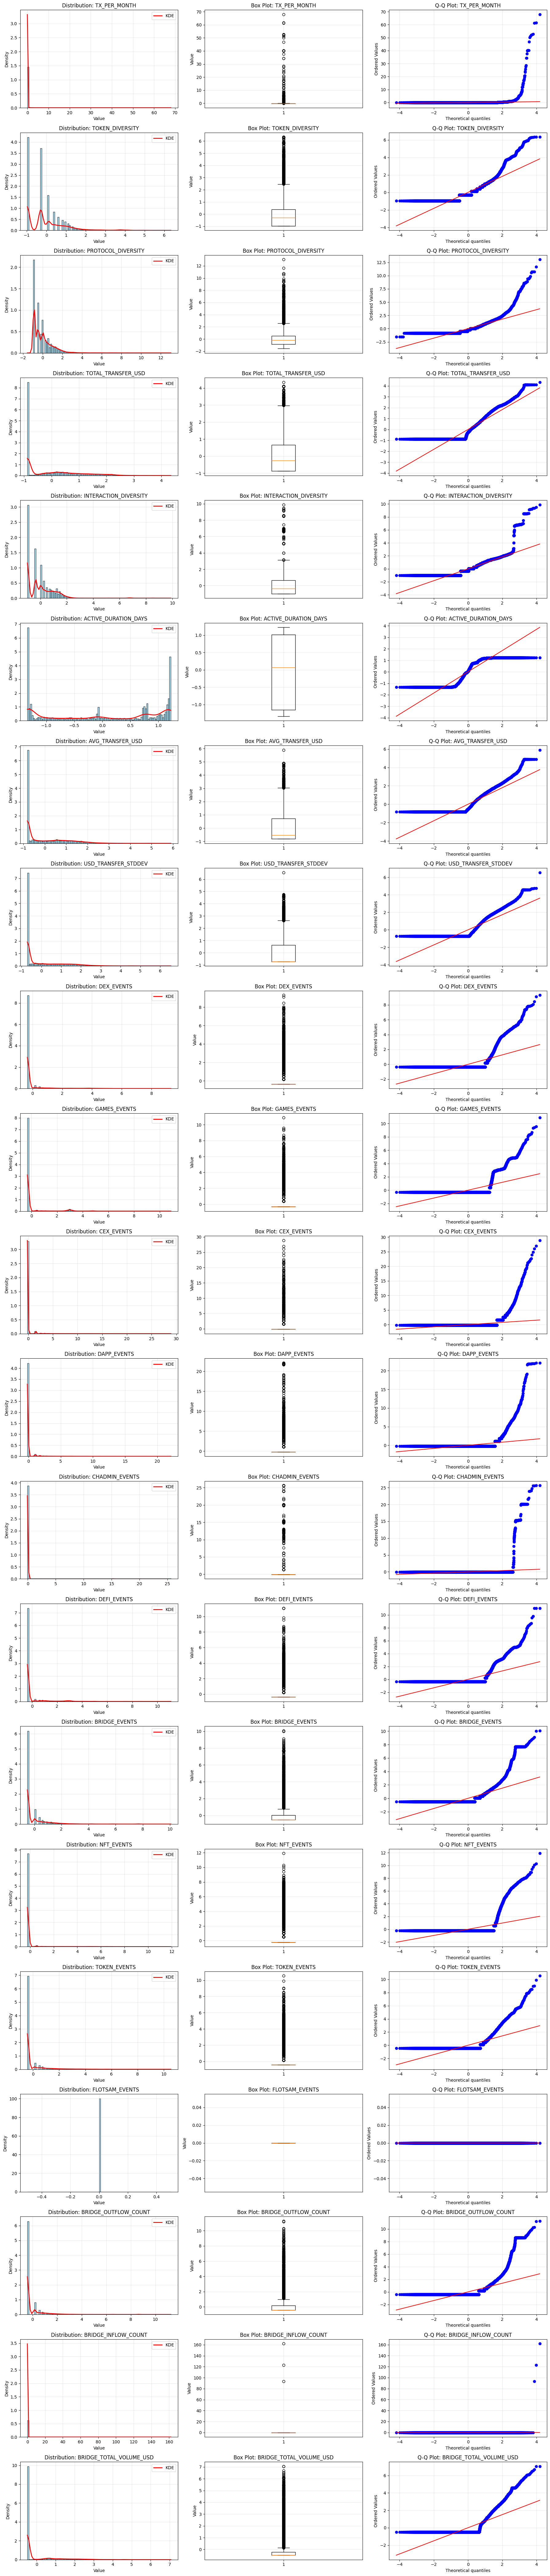

In [95]:
# IMPROVED DATA VISUALIZATION FOR BETTER INSIGHTS
# Let's create multiple types of plots to better understand the data distribution

# Get numeric columns (excluding WALLET if it exists)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
if 'WALLET' in numeric_columns:
    numeric_columns.remove('WALLET')

print(f"Analyzing {len(numeric_columns)} numeric features")
print("Features:", numeric_columns)

# 1. DISTRIBUTION ANALYSIS WITH BOX PLOTS AND HISTOGRAMS
fig, axes = plt.subplots(len(numeric_columns), 3, figsize=(18, 4*len(numeric_columns)))
if len(numeric_columns) == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(numeric_columns):
    # Histogram with KDE
    axes[i, 0].hist(data[column], bins=100, alpha=0.7, density=True, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Distribution: {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, alpha=0.3)
    
    # Add KDE line
    from scipy import stats
    if not data[column].isnull().all() and data[column].std() > 0:
        kde_x = np.linspace(data[column].min(), data[column].max(), 100)
        kde = stats.gaussian_kde(data[column].dropna())
        axes[i, 0].plot(kde_x, kde(kde_x), 'r-', linewidth=2, label='KDE')
        axes[i, 0].legend()
    
    # Box plot
    axes[i, 1].boxplot(data[column].dropna(), vert=True)
    axes[i, 1].set_title(f'Box Plot: {column}')
    axes[i, 1].set_ylabel('Value')
    axes[i, 1].grid(True, alpha=0.3)
    
    # Q-Q plot for normality assessment
    stats.probplot(data[column].dropna(), dist="norm", plot=axes[i, 2])
    axes[i, 2].set_title(f'Q-Q Plot: {column}')
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()